This is meant to analyse the statistics of a youtube channel to draw specific insights about it.

In [1]:
from youtube_api import YoutubeAPI

In [2]:
api = YoutubeAPI(video_url="https://www.youtube.com/watch?v=xYdl5pJT2aA&t=665s")

In [3]:
api.get_uploads_playlist_id()
api.get_video_ids_from_playlist()

[{'videoId': 'M4DAfzDnJzU',
  'viewCount': '4224',
  'likeCount': 0,
  'commentCount': '210',
  'duration': 'PT20M1S',
  'videoTitle': 'Can we escape Moloch’s trap with a GPU treaty?',
  'publishedAt': '2024-10-16T22:05:31Z'},
 {'videoId': '5OUqHv9C1To',
  'viewCount': '6399',
  'likeCount': '333',
  'commentCount': '86',
  'duration': 'PT26M3S',
  'videoTitle': 'Interview: a theoretical AI safety researcher on o1',
  'publishedAt': '2024-10-08T13:11:02Z'},
 {'videoId': 'cbzyGCO6y-s',
  'viewCount': '6729',
  'likeCount': '390',
  'commentCount': '64',
  'duration': 'PT17M39S',
  'videoTitle': 'How AI companies use the cloud, despite security risks',
  'publishedAt': '2024-09-29T09:00:29Z'},
 {'videoId': 'xYdl5pJT2aA',
  'viewCount': '8805',
  'likeCount': '404',
  'commentCount': '67',
  'duration': 'PT48M32S',
  'videoTitle': 'Interview: How to improve model inference beyond GPUs',
  'publishedAt': '2024-09-23T01:31:22Z'},
 {'videoId': 'zPFkUc0V5i4',
  'viewCount': '51127',
  'likeCo

In [4]:
data = api.get_video_stats()

### Exploratory Analysis

In [28]:
import pandas as pd

In [42]:
df = pd.DataFrame(data)

In [43]:
df.head(2)

,videoId,viewCount,likeCount,commentCount,duration,videoTitle,publishedAt
0,M4DAfzDnJzU,4224,0,210,PT20M1S,Can we escape Moloch’s trap with a GPU treaty?,2024-10-16T22:05:31Z
1,5OUqHv9C1To,6399,333,86,PT26M3S,Interview: a theoretical AI safety researcher ...,2024-10-08T13:11:02Z


In [44]:
df.dtypes

videoId         object
viewCount       object
likeCount       object
commentCount    object
duration        object
videoTitle      object
publishedAt     object
dtype: object

In [45]:
df['publishedAt'] = pd.to_datetime(df.publishedAt)
df['viewCount'] = pd.to_numeric(df.viewCount)
df['likeCount'] = pd.to_numeric(df.likeCount)
df['commentCount'] = pd.to_numeric(df.commentCount)

In [46]:
df.dtypes

videoId                      object
viewCount                     int64
likeCount                     int64
commentCount                  int64
duration                     object
videoTitle                   object
publishedAt     datetime64[ns, UTC]
dtype: object

### Visualization

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df.set_index('publishedAt', inplace=True)

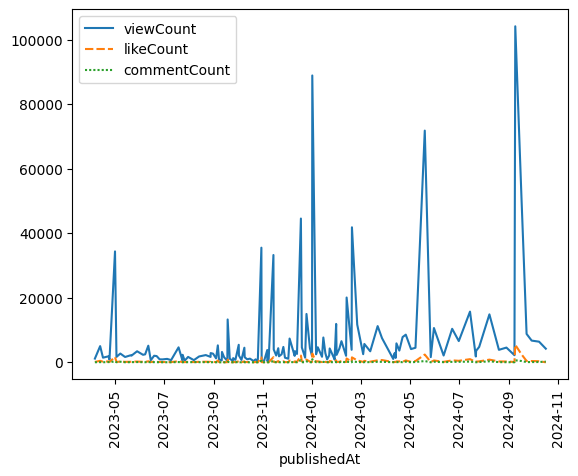

In [56]:
fig, ax = plt.subplots()
sns.lineplot(data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()